In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = pd.read_excel("data/a.xlsx")
b = pd.read_excel("data/b.xlsx")
c = pd.read_excel("data/c.xlsx")
d = pd.read_excel("data/d.xlsx")
e = pd.read_excel("data/e.xlsx")
f = pd.read_excel("data/f.xlsx")

In [3]:
a.head()

,题目类型,队号,队长姓名,队长所在学校,第一队友姓名,第一队友所在学校,第二队友姓名,第二队友所在学校,所获奖项
0,A,10013008,高雄,北京邮电大学,李响,北京邮电大学,陈彦虎,北京邮电大学,一等奖
1,A,10147001,蒲凌杰,辽宁工程技术大学,吕雅婷,辽宁工程技术大学,赵静,辽宁工程技术大学,一等奖
2,A,10252401,朱伟明,上海理工大学,王宁,上海理工大学,吕鹏程,上海理工大学,一等奖
3,A,10254014,徐凤新,上海海事大学,朱若琪,上海海事大学,吴方,上海海事大学,一等奖
4,A,10270029,黄中武,上海师范大学,彭钰,上海师范大学,丁子怡,上海师范大学,一等奖


In [4]:
data = a.append(b).append(c).append(d).append(e).append(f)

In [5]:
data.reset_index(drop=True,inplace=True)

In [6]:
data = data.rename({u'题目类型':'Problem',
             u'队号':'Team',
             u'队长姓名':'CaptainName',
             u'队长所在学校':'CaptainSchool',
             u'第一队友姓名':'FirstMemberName',
             u'第一队友所在学校':'FirstMemberSchool',
             u'第二队友姓名':'SecondMemberName',
             u'第二队友所在学校':'SecondMemberSchool',
             u'所获奖项':'Prize'
            })

In [7]:
data.head()

,题目类型,队号,队长姓名,队长所在学校,第一队友姓名,第一队友所在学校,第二队友姓名,第二队友所在学校,所获奖项
0,A,10013008,高雄,北京邮电大学,李响,北京邮电大学,陈彦虎,北京邮电大学,一等奖
1,A,10147001,蒲凌杰,辽宁工程技术大学,吕雅婷,辽宁工程技术大学,赵静,辽宁工程技术大学,一等奖
2,A,10252401,朱伟明,上海理工大学,王宁,上海理工大学,吕鹏程,上海理工大学,一等奖
3,A,10254014,徐凤新,上海海事大学,朱若琪,上海海事大学,吴方,上海海事大学,一等奖
4,A,10270029,黄中武,上海师范大学,彭钰,上海师范大学,丁子怡,上海师范大学,一等奖


In [8]:
totalNumber = len(data)

In [9]:
gb_p = data.groupby(u'题目类型')

In [10]:
p_s = list()
num_p = list()
for p, df_p in gb_p:
    p_s.append(str(p))
    num_p.append(len(df_p))

D:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


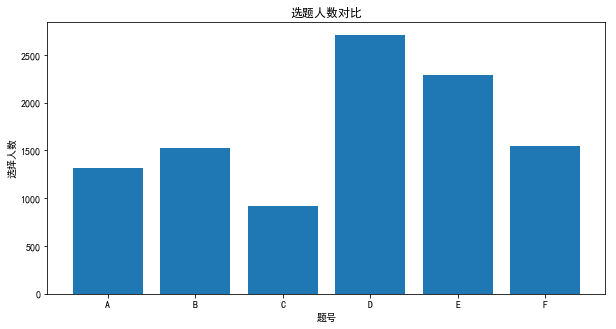

In [76]:
plt.figure(figsize=(10,5))
x = range(len(p_s))
plt.xticks(x,p_s,rotation=0)
plt.bar(x,num_p)
plt.title(u'选题人数对比')
plt.xlabel(u'题号')
plt.ylabel(u'选择人数')
plt.legend()
plt.show()

In [12]:
mix = len([str(d) for d in data[u'队号'].values.tolist() if 'K' in str(d)])

In [13]:
oth = totalNumber - mix

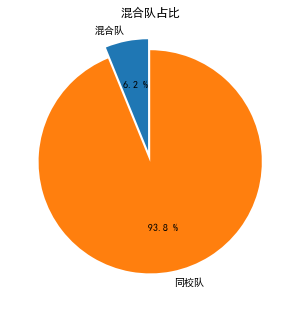

In [77]:
plt.figure(figsize=(5,10))
lab = [u'混合队', u'同校队']
y = [mix, oth]
explode = [0.1, 0] # 0.1 凸出这部分，
plt.axes(aspect=1) # set this , Figure is round, otherwise it is an ellipse
plt.pie(y,labels=lab,autopct='%3.1f %%',explode=explode,
        shadow=False, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.title(u'混合队占比')
plt.show()

In [16]:
gb_s = data.groupby(u'队长所在学校')

In [56]:
sch = [k for k in gb_s.groups.keys()]
num_sch = [len(v) for k,v in gb_s]

In [57]:
sorted_s = np.sort(num_sch)

In [79]:
y = sorted_s[-30:][::-1]
lab = []
for i in range(len(y)):
    for s, df_s in gb_s:
        if len(df_s) == y[i] and s not in lab:
            lab.append(s)

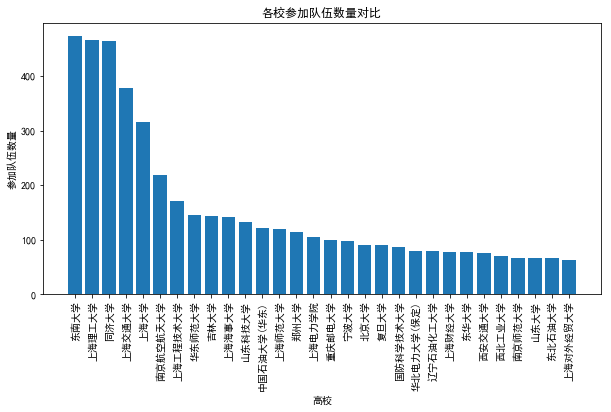

In [80]:
plt.figure(figsize=(10,5))
x = range(len(lab))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.xticks(x,lab,rotation=90)
plt.bar(x,y)
plt.title(u'各校参加队伍数量对比')
plt.xlabel(u'高校')
plt.ylabel(u'参加队伍数量')
plt.legend()
plt.show()